
        Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
        
        Edges:
        [[5, 7, 6, 10], [2, 8, 3], [9, 6, 9, 1, 10, 6, 2, 2, 8, 9], [8, 9, 9, 1, 7, 6], [6, 9, 5, 5], [6, 0, 6, 6, 4, 4, 6], [2, 5, 4, 5, 2, 8, 7, 0, 5, 3, 5], [8, 7, 7, 8, 9, 0, 6, 3], [7, 3, 7, 1, 9, 6, 8, 8, 2, 9], [2, 2, 3, 3, 4, 7, 8, 8, 2], [2, 0]]
        


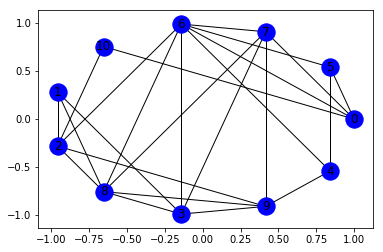

TypeError: list indices must be integers or slices, not NoneType

In [63]:
from Graph import Graph
from collections import Counter
import random

class CycleDetection(object):
    
    def __init__(self, g):
        self.g = g
        self._cycle = self._dfs() \
                      or self._findSelfLoop() \
                      or self._findParallelEdges() 

    def cycle(self):
        return self._cycle
    
    def _findSelfLoop(self):
        for v in range(self.g.vertices()):
            for e in self.g.adjacent(v):
                if e == v:
                    return [v, v]
        return None
    
    def _findParallelEdges(self):
        for v in range(self.g.vertices()):
            adjacency = self.g.adjacent(v)
            for i in range(len(adjacency)):
                for j in range(i+1, len(adjacency)):
                    if adjacency[i] == adjacency[j]:
                        return [v, adjacency[i], v]
        return None
    
    def _dfsHelper(self, u, v, marked, edgeTo):
        marked[v] = True
        for w in self.g.adv(v):
            
            if cycle is not None:
                return
            
            if not marked[w]:
                edgeTo[w] = v
                self._dfsHelper(v, w, marked, edgeTo)
            
            else if w != u:
                cycle = []
                x = v
                while x != w:
                    cycle.append(x)
                    x = edgeTo[x]
                cycle.append(v)
                cycle.append(w)
        return cycle
            
                
            
    
    def _dfs(self):
        vertices = self.g.vertices()
        marked = [False for v in range(vertices)]
        edgeTo = [None for v in range(vertices)]
        cyc = None
        for v in range(self.g.vertices()):
            if not marked[v]:
                cyc = cyc or self._dfsHelper(-1, v, marked, edgeTo)
        return cyc
            

if __name__ == "__main__":
    nodes = random.randint(1, 20)
    edges = random.randint(0, nodes * int((nodes - 1) / 2))
    g = Graph.generateRandomGraph(nodes, edges)
    print(g)
    g.displayGraph()
    cycleDetector = CycleDetection(g)
    print(cycleDetector.cycle())